In [53]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
class Guess_next:

    def __init__(self,n,limit=30):
        self.limit = limit
        self.n = n
        self.arr = []
        self.predicts = [int(random.uniform(1,6)) for i in range(2)]
        self.selection_arr = []

    def generate_array(self,show=False):
        arr = []
        for i in range(self.n):
            values = [random.randint(1,self.limit*2) for i in range(self.n)]
            for i in range(len(self.predicts)):
                x = int(random.uniform(0,len(values)))
                values[x] = 0
            while sum(values) > self.limit:
                x = int(random.uniform(0,len(values)))
                if values[x] > 0:
                    values[x] -= 1

            arr.append(values)

        self.arr = arr.copy()
        if show:
            print(self.arr)

    def choose_array(self,m):
        arr = self.arr[m].copy()
        self.selection_arr = arr
        return arr
    
    def calculate_score(self):
        score = 0
        for i,val in enumerate(self.selection_arr):
            if val == 0 and i in self.predicts:
                score += i**2
            elif val == 0 and i not in self.predicts:
                score -= i**2
            else:
                pass
        
        self.score = score

    def optimal_score(self):
        max_score = -self.n**2
        for i in range(self.n):
            self.choose_array(i)
            self.calculate_score()
            if self.score > max_score:
                max_score = self.score
            
        return max_score
    
    def strategy_1_min_strategy(self):
        min_index = 0
        index = 0
        for i,arr in enumerate(self.arr):
            zero_indexes = [j for j in range(len(arr)) if arr[j] == 0]
            if sum(zero_indexes) < min_index:
                min_index = sum(zero_indexes)
                index = i

        
        self.choose_array(index)
        self.calculate_score()

        return self.score
    
    def strategy_2_max_strategy(self):
        max_index = 0
        index = 0
        for i,arr in enumerate(self.arr):
            zero_indexes = [j for j in range(len(arr)) if arr[j] == 0]
            if sum(zero_indexes) > max_index:
                max_index = sum(zero_indexes)
                index = i

        
        self.choose_array(index)
        self.calculate_score()

        return self.score
    
    def random_strategy(self):
        x = int(random.uniform(0,self.n))
        self.choose_array(x)
        self.calculate_score()

        return self.score
    
    def optimal_strategy(self):
        expectation = 0
        index = 0
        for i, arr in enumerate(self.arr):
            zero_indexes = [i**2 for i in range(len(arr)) if arr[i] == 0]
            zero_indexes = sorted(zero_indexes,reverse=False)[0:2]

            num_indexes = [i**2 for i in range(len(arr)) if arr[i] != 0]
            num_indexes = sorted(num_indexes,reverse=True)[0:2]
            temp_e = (sum(zero_indexes) + sum(num_indexes)) / 2
            if temp_e > expectation:
                expectation = temp_e
                index = i

        self.choose_array(index)
        self.calculate_score()

        return self.score
    


    def plot_arrays(self, arr, arr2, arr3, arr4, title="Array Plot"):
        sns.set_theme(style="darkgrid", context="talk")

        plt.figure(figsize=(10, 6))

        sns.lineplot(
            x=range(len(arr)), y=arr,
            label="Array 1",
            linewidth=2.5,
            marker="o",
            alpha=0.9
        )

        sns.lineplot(
            x=range(len(arr2)), y=arr2,
            label="Array 2",
            linewidth=2.5,
            marker="s",
            alpha=0.9
        )

        sns.lineplot(
            x=range(len(arr3)), y=arr3,
            label="Array 3",
            linewidth=2.5,
            marker="^",
            alpha=0.9
        )

        sns.lineplot(
            x=range(len(arr4)), y=arr4,
            label="Array 4",
            linewidth=2.5,
            marker="D",
            alpha=0.9
        )

        plt.title(title, fontsize=16, weight="bold")
        plt.xlabel("Index", fontsize=12)
        plt.ylabel("Value", fontsize=12)

        plt.legend(
            title="Arrays",
            loc="best",
            frameon=True,
            fancybox=True,
            shadow=True
        )

        plt.tight_layout()
        plt.show()

        
        

In [89]:
game = Guess_next(10)
game.generate_array(show=True)

optimal_score = game.optimal_score()
strategy_1_score = game.strategy_1_min_strategy()
strategy_2_score = game.strategy_2_max_strategy()
strategy_random_score = game.random_strategy()
optimal_strategy = game.optimal_strategy()

print(f"optimal_score is {optimal_score} and strategy 1 score is {strategy_1_score}")
print(f"optimal_score is {optimal_score} and strategy 2 score is {strategy_2_score}")
print(f"optimal_score is {optimal_score} and strategy random score is {strategy_random_score}")
print(f"optimal_score is {optimal_score} and strategy optimal score is {optimal_strategy}")

[[0, 10, 0, 0, 1, 0, 7, 0, 0, 12], [0, 8, 0, 10, 0, 0, 12, 0, 0, 0], [18, 0, 7, 0, 0, 0, 0, 0, 5, 0], [6, 0, 23, 0, 0, 0, 0, 0, 0, 1], [22, 0, 0, 0, 0, 0, 0, 0, 8, 0], [0, 16, 0, 5, 0, 0, 0, 0, 0, 9], [0, 0, 0, 5, 0, 7, 2, 0, 16, 0], [5, 0, 0, 0, 22, 0, 0, 3, 0, 0], [0, 0, 9, 0, 0, 13, 0, 0, 8, 0], [7, 0, 0, 8, 0, 0, 0, 0, 15, 0]]
optimal_score is -100 and strategy 1 score is -133
optimal_score is -100 and strategy 2 score is -201
optimal_score is -100 and strategy random score is -149
optimal_score is -100 and strategy optimal score is -133


In [81]:
sgy_min= []
sgy_max = []
sgy_random = []
sgy_optimal = []
sgy_maximum = []
game = Guess_next(10)
error = 0
N = 100
for i in range(N):
    
    game.generate_array()
    maximum_score = game.optimal_score()
    strategy_1_score = game.strategy_1_min_strategy()
    strategy_2_score = game.strategy_2_max_strategy()
    strategy_random_score = game.random_strategy()
    optimal_strategy = game.optimal_strategy()

    sgy_min.append(strategy_1_score)
    sgy_max.append(strategy_2_score)
    sgy_random.append(strategy_random_score)
    sgy_optimal.append(optimal_strategy)
    sgy_maximum.append(maximum_score)

    strg_arr = [strategy_1_score,strategy_2_score,strategy_random_score,optimal_strategy]
    if max(strg_arr) != optimal_strategy:
        print(f"THERE IS AN ERROR {max(strg_arr)}")
        error += 1

    print(f"optimal score is {maximum_score} and strategy scores are: {strategy_1_score} {strategy_2_score} {strategy_random_score} {optimal_strategy}")


print(f"acc is {(N-error) / N}")

optimal score is -82 and strategy scores are: -126 -259 -210 -126
optimal score is -41 and strategy scores are: -41 -259 -105 -41
optimal score is -100 and strategy scores are: -105 -231 -101 -101
optimal score is -65 and strategy scores are: -171 -154 -90 -90
optimal score is -54 and strategy scores are: -185 -185 -138 -54
optimal score is -89 and strategy scores are: -153 -170 -153 -89
THERE IS AN ERROR -169
optimal score is -100 and strategy scores are: -256 -231 -169 -211
optimal score is -100 and strategy scores are: -110 -230 -230 -101
optimal score is -100 and strategy scores are: -186 -231 -166 -143
optimal score is -100 and strategy scores are: -207 -218 -176 -147
optimal score is -77 and strategy scores are: -145 -219 -77 -77
optimal score is -77 and strategy scores are: -256 -231 -145 -77
THERE IS AN ERROR -52
optimal score is -52 and strategy scores are: -150 -153 -52 -90
optimal score is -36 and strategy scores are: -255 -255 -142 -36
optimal score is -100 and strategy sco

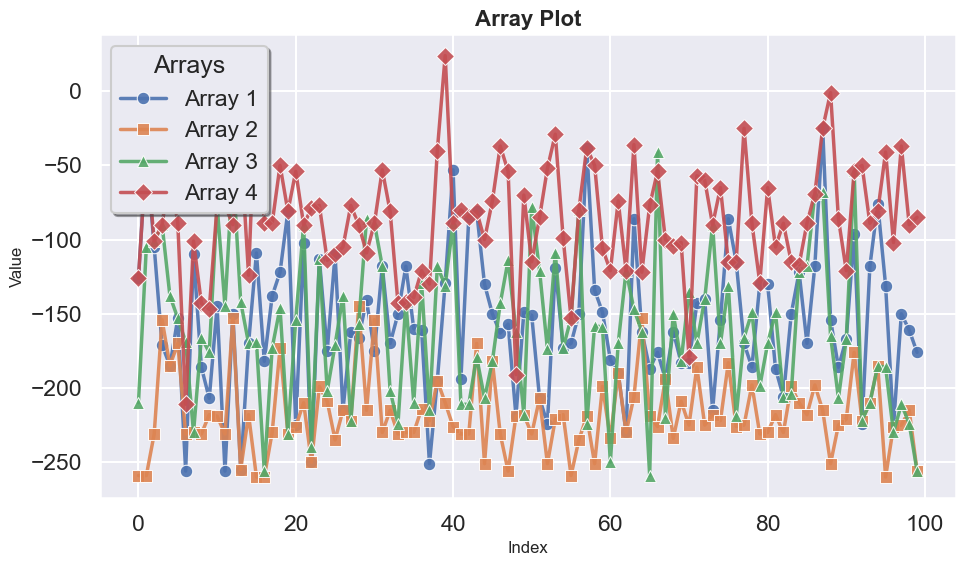

In [82]:
game.plot_arrays(sgy_min,sgy_max,sgy_random,sgy_optimal)

In [83]:
arr = [sgy_maximum,sgy_min,sgy_max,sgy_random,sgy_optimal]

list(map(lambda x: np.mean(x),arr))

[np.float64(-71.5),
 np.float64(-155.76),
 np.float64(-217.85),
 np.float64(-160.89),
 np.float64(-86.38)]